# Implementacion LeNet-5  y test en mnist

In [21]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Cargamos los datos


In [41]:
# Cargar el dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Hacemos reshape de las imágenes para que tengan un canal
train_X_n = train_X.reshape((train_X_n.shape[0], 28, 28, 1))
test_X_n = test_X.reshape((test_X_n.shape[0], 28, 28, 1))


In [46]:
train_X_32= np.zeros(shape=(train_X_n.shape[0],32,32,1))
train_X_32[:,2:-2,2:-2,:]=train_X_n
test_X_32= np.zeros(shape=(test_X_n.shape[0],32,32,1))
test_X_32[:,2:-2,2:-2,:]=test_X_n

### Entrenamos el modelo

In [47]:
# Armar el modelo
model = Sequential()
model.add(Conv2D(filters= 6, kernel_size=(5,5), strides=1, activation='tanh',input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=1))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))  

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [49]:
# Entrenamos el modelo
model.fit(
  train_X_32,
  to_categorical(train_y),
  epochs=10,
  validation_data=(test_X_32, to_categorical(test_y)),
)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1589 - accuracy: 0.9523 - val_loss: 0.0727 - val_accuracy: 0.9774
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0737 - accuracy: 0.9769 - val_loss: 0.0560 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0538 - accuracy: 0.9838 - val_loss: 0.0644 - val_accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0481 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0547 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0439 -

In [50]:
# Guardar el modelo al disco
model.save_weights('LeNet5.h5')

# Cargar el modelo del disco
# model.load_weights('LeNet5.h5')

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


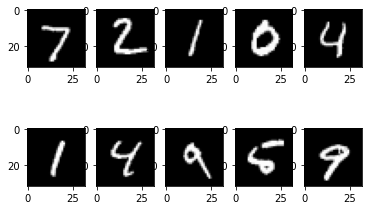

In [56]:
# Predecir las primeras 10 imágenes del test set
predicciones = model.predict(test_X_32[:10])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1))

# Chequear que son correctas
print(test_y[:10])

# Plotear esas imágenes
for i in range(10):
	pyplot.subplot(2,5,i+1)
	pyplot.imshow(test_X_32[i][:,:,0], cmap=pyplot.get_cmap('gray'))
pyplot.show()